Epoch 1/50
235/235 [==============================] - 9s 23ms/step - loss: 0.2740 - val_loss: 0.1881
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1699 - val_loss: 0.1528
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1435 - val_loss: 0.1333
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1285 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1188 - val_loss: 0.1137
Epoch 6/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1119 - val_loss: 0.1080
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1068 - val_loss: 0.1035
Epoch 8/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1029 - val_loss: 0.1000
Epoch 9/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1000 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0978 - val_lo

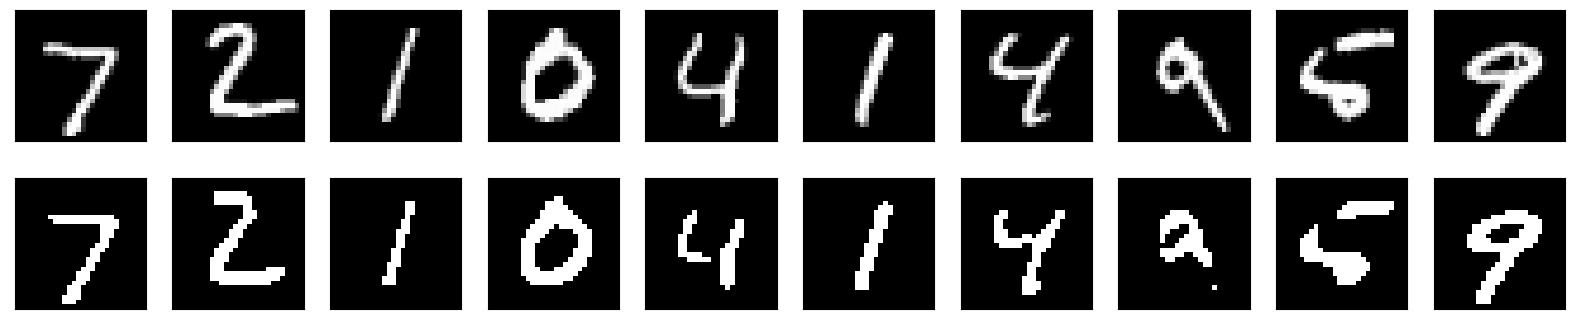

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))
test_loss = autoencoder.evaluate(x_test, x_test)
decoded_imgs = autoencoder.predict(x_test)

threshold = 0.5
correct_predictions = np.sum(
np.where(x_test >= threshold, 1, 0) ==
np.where(decoded_imgs >= threshold, 1, 0)
)

total_pixels = x_test.shape[0] * x_test.shape[1]
test_accuracy = correct_predictions / total_pixels
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
# Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Display reconstruction with threshold
    ax = plt.subplot(2, n, i + 1 + n)
    reconstruction = decoded_imgs[i].reshape(28, 28)
    plt.imshow(np.where(reconstruction >= threshold, 1.0, 0.0))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()